<a href="https://colab.research.google.com/github/bioquaintum/pyneurorg/blob/main/examples/01_Creating_Your_First_Organoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Your First Organoid with pyneurorg

**Objective:** This notebook introduces the fundamental steps to create a simple brain organoid using the `pyneurorg` library. We will define a neuronal population, assign spatial positions, and briefly touch upon synaptic connections.

**Key `pyneurorg` components used:**
- `pyneurorg.organoid.Organoid`: The main class for representing an organoid.
- `pyneurorg.core.neuron_models`: Predefined neuron models (e.g., LIFNeuron).
- `pyneurorg.organoid.spatial`: Functions for generating neuron positions.

In [8]:
!pip3 install pyneurorg

## 1. Imports and Setup

First, let's import the necessary modules from `brian2` and `pyneurorg`. We also import `matplotlib` for visualization.

In [1]:
import brian2 as b2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For 3D plotting

# Assuming pyneurorg is installed or accessible in the Python path
from pyneurorg.organoid.organoid import Organoid
from pyneurorg.core import neuron_models
from pyneurorg.organoid import spatial

# Set Brian2 preferences for reproducibility (optional, but good practice)
b2.prefs.codegen.target = 'numpy' # Use numpy backend for simplicity in examples
b2.seed(42) # For reproducible random number generation
np.random.seed(42)

## 2. Define Neuron Model Parameters

We'll start by selecting a neuron model from `pyneurorg.core.neuron_models`. For this example, we'll use the Leaky Integrate-and-Fire (LIF) model. We can customize its parameters or use the defaults.

In [2]:
# Get the LIF neuron model function
lif_model_func = neuron_models.LIFNeuron

# Define parameters for our LIF neurons (optional, can use defaults)
lif_params = {
    'tau_m': 20*b2.ms,
    'v_rest': -65*b2.mV,
    'v_reset': -65*b2.mV,
    'v_thresh': -50*b2.mV,
    'R_m': 100*b2.Mohm, # Will be used if I_input is current
    'refractory_period': 5*b2.ms
}

print(f"LIF Model Parameters to be used: {lif_params}")

LIF Model Parameters to be used: {'tau_m': 20. * msecond, 'v_rest': -65. * mvolt, 'v_reset': -65. * mvolt, 'v_thresh': -50. * mvolt, 'R_m': 100. * Mohm, 'refractory_period': 5. * msecond}


## 3. Instantiate the Organoid

Now, we create an instance of the `Organoid` class. This object will hold all our neurons, synapses, and their properties.

In [3]:
my_first_organoid = Organoid(name="MySimpleOrganoid")
print(my_first_organoid)

<Organoid 'MySimpleOrganoid' with 0 neuron group(s) and 0 synapse group(s)>


## 4. Add a Neuronal Population

We will add a single population of 100 LIF neurons to our organoid. We need to specify:
- A unique name for this population (e.g., "excitatory_neurons").
- The number of neurons.
- The model name (string corresponding to the function in `neuron_models`).
- The parameters for that model (which we defined above).
- How the neurons are spatially distributed.

### 4.1. Define Spatial Distribution

Let's place our neurons randomly within a small sphere using a function from `pyneurorg.organoid.spatial`.

In [4]:
num_neurons_population1 = 100
sphere_radius = 150*b2.um

spatial_dist_func_name = "random_positions_in_sphere"
spatial_params_dict = {
    'N': num_neurons_population1, # This will be automatically set by Organoid.add_neurons too
    'radius': sphere_radius,
    'center': (0,0,0)
}

# Alternatively, generate positions beforehand:
# neuron_positions = spatial.random_positions_in_sphere(N=num_neurons_population1, radius=sphere_radius)
# print(f"Generated {len(neuron_positions)} positions.")

### 4.2. Add the Neuron Group to the Organoid

In [5]:
neuron_group_name = "lif_population_1"

ng1 = my_first_organoid.add_neurons(
    name=neuron_group_name,
    num_neurons=num_neurons_population1,
    model_name="LIFNeuron", # Name of the function in neuron_models
    model_params=lif_params,
    # Option 1: Provide the function name and its parameters
    spatial_distribution_func=spatial_dist_func_name,
    spatial_params=spatial_params_dict,
    # Option 2: Provide pre-generated positions (uncomment neuron_positions above and use this)
    # positions=neuron_positions,
    initial_values={'v': -70*b2.mV} # Set initial membrane potential for all neurons
)

print(f"Added NeuronGroup: {ng1}")
print(f"Organoid now contains: {my_first_organoid.neuron_groups.keys()}")

Added NeuronGroup: NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='lif_population_1')
Organoid now contains: dict_keys(['lif_population_1'])


## 5. Visualize Neuron Positions

Let's visualize the 3D positions of the neurons we just created.

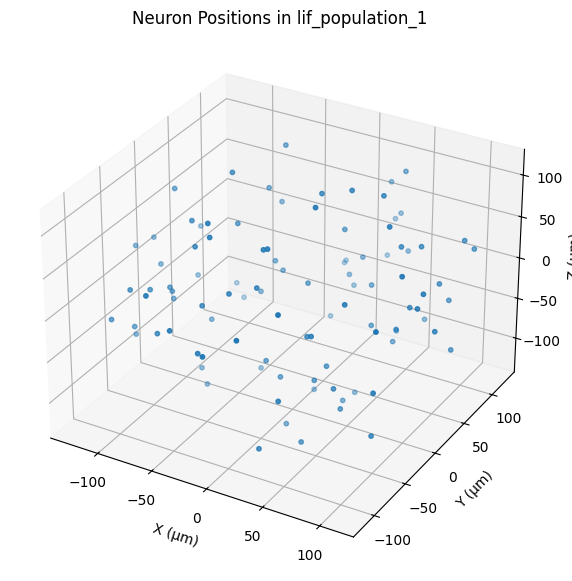

In [6]:
positions_ng1 = my_first_organoid.get_positions(neuron_group_name)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Convert to a common unit (e.g., um) for plotting if necessary, and get scalar values
x = positions_ng1[:, 0] / b2.um
y = positions_ng1[:, 1] / b2.um
z = positions_ng1[:, 2] / b2.um

ax.scatter(x, y, z, s=10)

ax.set_xlabel('X (µm)')
ax.set_ylabel('Y (µm)')
ax.set_zlabel('Z (µm)')
ax.set_title(f'Neuron Positions in {neuron_group_name}')

# Set equal aspect ratio for a better sphere visualization
max_range = np.array([x.max()-x.min(), y.max()-y.min(), z.max()-z.min()]).max() / 2.0
mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

## 6. (Optional) Adding a Second Population and Synapses

For a more complete organoid, we would add more neuron populations (e.g., inhibitory) and define synaptic connections between them. Here's a brief look at how you might add synapses. We'll use a simple static conductance synapse model.

*(This part is a preview; detailed synapse usage will be in later notebooks.)*

In [7]:
# Let's quickly add a smaller, second population (e.g., inhibitory)
num_neurons_population2 = 20
inhib_neuron_name = "lif_population_2_inhib"
inhib_positions = spatial.random_positions_in_sphere(
    N=num_neurons_population2,
    radius=sphere_radius * 0.8, # Slightly smaller sphere for this group
    center=(0,0,0)
)

ng2 = my_first_organoid.add_neurons(
    name=inhib_neuron_name,
    num_neurons=num_neurons_population2,
    model_name="LIFNeuron",
    model_params=lif_params, # Could use different params for inhib neurons
    positions=inhib_positions,
    initial_values={'v': -70*b2.mV}
)
print(f"Added NeuronGroup: {ng2}")

# Define synapse model parameters
# For this example, the postsynaptic neuron model (LIFNeuron) needs a variable
# for the synaptic conductance, e.g., 'g_exc'. Let's assume our LIF model will be
# extended to include this or we will inject current directly via synapses later.
# For now, this is a conceptual setup.

syn_model_name = "StaticConductanceSynapse"
syn_params = {
    'target_conductance_var': 'g_syn_input' # A placeholder, neuron model needs this variable
}

# Add synapses from ng1 to ng2 (e.g., excitatory to inhibitory)
syn_e_to_i_name = "syn_exc_to_inhib"

if hasattr(ng1, 'g_syn_input') and hasattr(ng2, 'g_syn_input'): # Simple check, actual model needs it
    syn_e_to_i = my_first_organoid.add_synapses(
        name=syn_e_to_i_name,
        pre_group_name=neuron_group_name, # ng1
        post_group_name=inhib_neuron_name, # ng2
        model_name=syn_model_name,
        model_params=syn_params,
        connect_prob=0.1, # Connect with 10% probability
        synaptic_params={'w_syn': 1.0*b2.nS} # Set the weight for these connections
    )
    print(f"Added Synapses: {syn_e_to_i}")
    print(f"Number of actual E->I synapses created: {len(syn_e_to_i)}")
else:
    print("Skipping synapse creation as placeholder 'g_syn_input' is not in the basic LIF model yet.")
    print("This will be properly handled when neuron models explicitly include synaptic current terms.")

print(f"Organoid now contains synapse groups: {my_first_organoid.synapses.keys()}")

Added NeuronGroup: NeuronGroup(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='lif_population_2_inhib')
Skipping synapse creation as placeholder 'g_syn_input' is not in the basic LIF model yet.
This will be properly handled when neuron models explicitly include synaptic current terms.
Organoid now contains synapse groups: dict_keys([])


## 7. Summary

In this notebook, we've successfully:
1. Imported necessary `pyneurorg` components.
2. Defined parameters for a LIF neuron model.
3. Created an `Organoid` instance.
4. Added a population of neurons with a specific spatial distribution.
5. Visualized the neuron positions.
6. Briefly previewed how to add another population and synapses (conceptual at this stage for full integration).

The next notebook will show how to simulate this organoid and record its activity.